## Ecuación De Calor O Difusión De Calor
Esta ecuación hace referencia a una ecuación diferencial parcial en una dimensión  ecuación 1 . En este caso se presenta una función de $T(x,t)$ lo cual va depender de la posición en una dimensión, que en este caso es la variable "x "y el tiempo "t" y va estar sujeta una constante positiva  que la denotaremos con el nombre de $\alpha$ que es la "Difusividad Térmica ".

\begin{equation}
{
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{ \partial x^2}.....   (1)
\label{ec:1}
}
\end{equation}


En el siguiente código, veremos la solución númerica de esta ecuación diferencial parcial utilizando el método de " Diferencia Finitas". se aplico el concepto de diferencia finita centrada para la derivada de segundo orden y diferencia finita hacia adelante para la derivada de primer orden.Para resaltar este código se necesita de algunas condiciones que en este caso se denota como iniciales y contorno o frontera.

Ahora en este código se planteo un ejercicio con simetria lineal que nos referimo a una barra, que en este caso  su longitud es $L=2 metros $, pero este valor se puede modificar . Para relacionar nuestras condiciones de contorno  con  los extremos de la barra  y lo podemos expresar en la ecuación 2 y 3  , pero en nuestro código estos valores se pueden variar por el usuario.  
\begin{equation}
{
T(x=0)=20°c \rightarrow t >= 0....(2)
}
\end{equation}
\begin{equation}
{
 T(x=L)= 40°c \rightarrow t >= 0....(3)
 }
 \end{equation}
 
Luego agregamos para las condiciones inciales  lo veremos en la expresión 4
\begin{equation}
{
 Tinicial(t=0)= 0°c \rightarrow  0< x < L ..... (4)
 }
 \end{equation}
 Para terminar unos parametros que debemos tener en cuenta sera la estabilidad númerica  que se denota como nombre "sigma"  es un valor que tiene que ser igual o menor o igual que $0.5$, y este término no es un poco caótico, pero si lo hace cambiar dependiendo de la difusividad termica lo cual este depende del tipo del material, y una segunda dependencia serie el número de puntos(nx) de desea trabajar.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


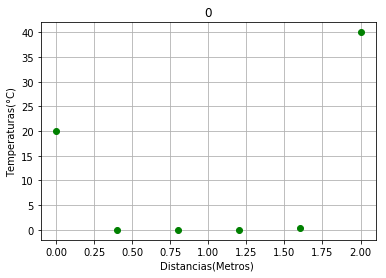

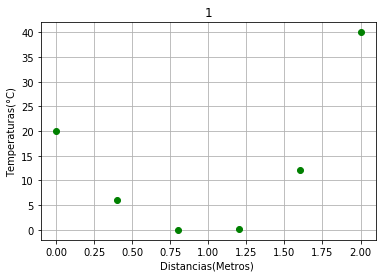

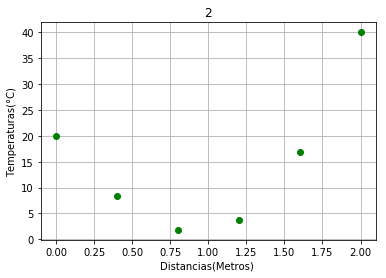

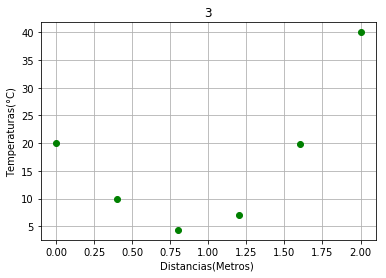

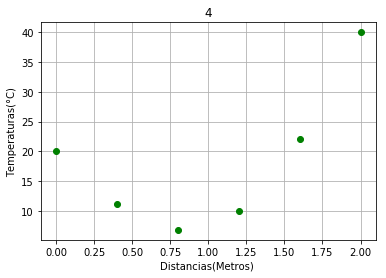

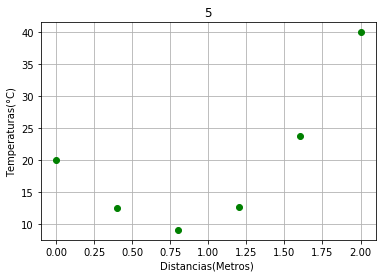

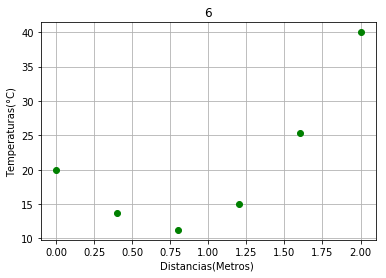

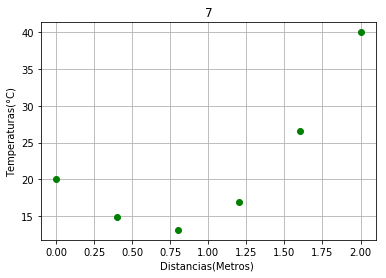

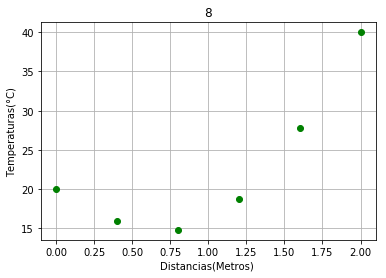

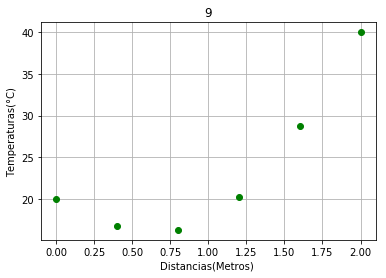

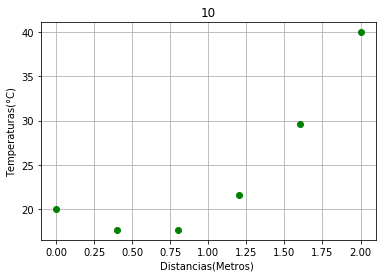

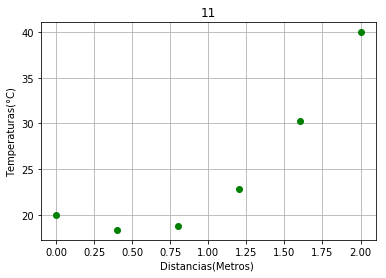

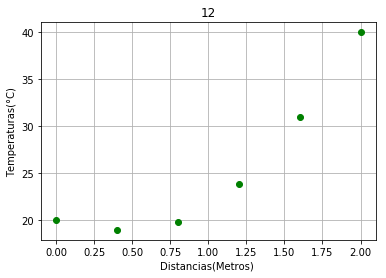

In [117]:

import numpy 
from pylab import *

nx=5 # número de puntos
longitud_barra=2 # la longitud de la barra
alpha=0.15 #coeficiente de difusión térmico
nt=13 # numero de pasos en el tiempo 
dx=longitud_barra/(nx-1)

sigma= 0.3  # valor de la estabilidad númerica
dt=sigma*dx**2/alpha


T1=20 # condiciones de contorno lado izquiero
#T1=float(input(" ingrese el valor de la condicion de contorno"))
T2=40   # condiciones de contorno  lado derecho 
#T2=float(input(" ingrese el valor de la condicion de contorno"))
T_in=0
T=numpy.ones(nx+1)
T_funp=numpy.ones(nx+1)
x=numpy.linspace(0,longitud_barra, nx+1)

#Aquí se inicia asociado la condicion inicial   con la funcion principal


for i in range(nx):
    T[i]=0
# Aqui se hace el calculo de las derivadas      
for l in range(0,nt): # for del tiempo 
    for i in range(1,nx): # for de la posición 
        T_funp[i]= T[i] + sigma*(T[i-1] - 2*T[i] + T[i+1])
    #condiciones iniciales
    T_funp[0]= T1 #c°
    T_funp[nx]=T2
    # la actualizacion de la función 
    T=T_funp.copy()
    
    # Graficando la temperatura vs la posición de cada paso
    
    plot(x,T_funp,'og')
    xlabel('Distancias(Metros) ')
    ylabel('Temperaturas(°C)')
    grid('on')
    title( l)
    show()
  
   

    


               
                
            
                
                
        



